# 機械学習入門授業前課題1 アヤメの分類

【課題1】練習のために特徴量とカテゴリを選択<br>
選び方は合計18通りありますが、以下の組み合わせで練習することにします。irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。<br>
<br>
virgicolorとvirginica<br>
sepal_lengthとpetal_length<br>

In [22]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import scipy as stats

In [18]:
# week3-1　事前課題より抜粋
iris = datasets.load_iris()
print(iris.target_names)
# 抜き出すのはindex50~最後まで
X = pd.DataFrame(iris.data, columns=(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']))
y = pd.DataFrame(iris.target, columns=(['Species']))
df = pd.concat([X, y], axis=1)

['setosa' 'versicolor' 'virginica']


In [21]:
train_df = df.loc[50:, ['sepal_length', 'petal_length', 'Species']]
train_df

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


【問題2】データの分析

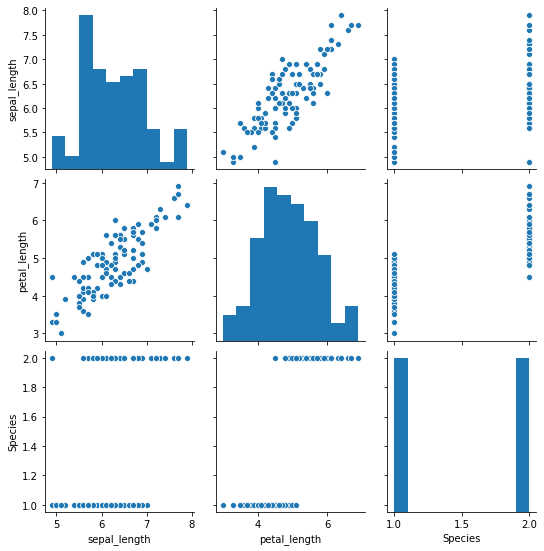

In [23]:
# 散布図行列
sns.pairplot(train_df)

array([<AxesSubplot:title={'center':'petal_length'}, xlabel='[Species]'>,
       <AxesSubplot:title={'center':'sepal_length'}, xlabel='[Species]'>],
      dtype=object)

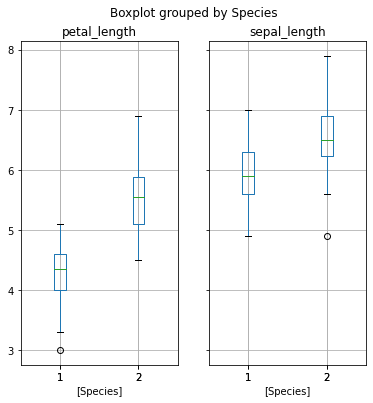

In [28]:
# 箱ひげ図
train_df.boxplot(by='Species', figsize=(6,6))

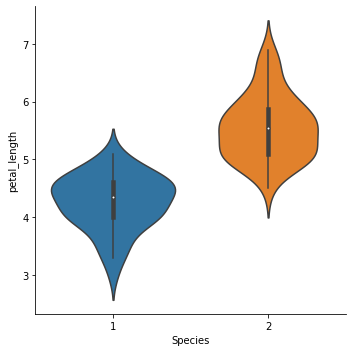

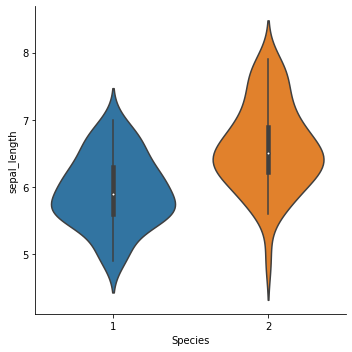

In [30]:
# バイオリン図
sns.catplot(x='Species', y='petal_length', kind='violin', data=train_df)
sns.catplot(x='Species', y='sepal_length', kind='violin', data=train_df)

【問題3】前処理・訓練データと検証データの分割

In [46]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(train_df, test_size=0.25)
train_y = train['Species']
test_y = test['Species']
train.drop(columns='Species', axis=1, inplace=True)
test.drop(columns='Species', axis=1, inplace=True)
# 以下ndarrayの入力データ達
train_y = np.array(train_y)
test_y = np.array(test_y)
train_X = np.array(train)
test_X = np.array(test)

【問題4】前処理・標準化

In [50]:
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()
StandardScaler.fit(train)
norm_train_X = StandardScaler.transform(train_X)
norm_test_X = StandardScaler.transform(test_X)

【問題5】学習と推定

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
# n_neighbors = 5
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(norm_train_X, train_y)
result_5 = knn_5.predict(norm_test_X)
result_5

array([2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2,
       1, 2, 2])

In [85]:
# n_neighbors = 3
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(norm_train_X, train_y)
result_3 = knn_3.predict(norm_test_X)
result_3

array([2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2,
       1, 2, 2])

In [86]:
# n_neighbors = 1
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(norm_train_X, train_y)
result_1 = knn_1.predict(norm_test_X)
result_1

array([2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 2])

【問題6】評価

In [87]:
from sklearn import metrics

In [104]:
# n_neighbors = 5の評価：accuracy_score
accuracy = metrics.accuracy_score(test_y, result_5)
print('正解率: {}%'.format(accuracy*100))

正解率: 92.0%


In [105]:
# n_neighbors = 5の評価：precision_score
precision = metrics.precision_score(test_y, result_5)
print('適合率: {}%'.format(precision*100))

適合率: 100.0%


In [106]:
# n_neighbors = 5の評価：Recall
recall = metrics.recall_score(test_y, result_5)
print('再現率: {}%'.format(recall*100))

再現率: 81.81818181818183%


In [108]:
# n_neighbors = 5の評価：F_value
f_value = metrics.f1_score(test_y, result_5)
print('F値: {}'.format(f_value))

F値: 0.9


In [109]:
# n_neighbors = 5の評価：confusion matrix
confusion_matrix = metrics.confusion_matrix(test_y, result_5)
print('混合行列: \n', confusion_matrix)

混合行列: 
 [[ 9  2]
 [ 0 14]]


ここで評価した指標の意味<br>
正解率：正解率とは、全ての事象の中で、診断結果が合っていた（TP/TNに分類された）数の割合<br>
適合率：正と予測したデータのうち，実際に正であるものの割合。「精度」と呼ぶこともあり。<br>
再現率：実際に正であるもののうち，正であると予測されたものの割合<br>
F値：適合率と再現率の調和平均　2×適合率×再現率 / (適合率 + 再現率)<br>
参考サイト：https://qiita.com/FukuharaYohei/items/be89a99c53586fa4e2e4<br>
<br>
混合行列とは：2値分類問題において、予測と実際の分類を行列形式にまとめたもの。以下の要素で構成されている<br>
・真陰性(True Negative, TN, 左上)：検査で陰性とされ、実際に陰性である場合<br>
・偽陰性(False Negative, FN, 左下)：検査で陰性とされたものの、実際には陽性である場合<br>
・偽陽性(False Positive, FP, 右上)：検査で陽性とされたものの、実際には陰性である場合<br>
・真陽性(True Positive, TP, 右下)：検査で陽性とされ、実際に陽性である場合<br>
参考サイト：https://www.codexa.net/ml-evaluation-cls/<br>

F値の意味ってなんぞ？<br>
例：100人に1人がかかる病気について、10000人を対象に予測する場合を考える<br>
TP=90, FP=990, FN=10, TN=8910だった時、<br>
精度：0.9, 適合率：0.08333..., 再現率：0.9, F値：0.15254...<br>
予測器の精度としては、0.9（90％）と高めですが、F値を見てみると0.15と低め。<br>
「精度90％の予測器」と聞くと、それなりに高精度だが、今回のような場合、それぞれの指標を見ると、再現率と適合率のバランスが悪い。<br>
この再現率と適合率のバランスの悪さを見抜ける点が、F値の重要な役割となってくる<br>
今回の予測器を実際に病院で運用すると仮定した場合、10000人中990人は病気ではないが、”陽性”と判断されている以上は、何かしらの検査を実施しなければいけない。<br>
いくら精度90％とはいえ、実運用上では厳しそうな感じがする。<br>
つまり、F値を見ることによって、見かけの精度が”本物”かどうか判断できるようになる。<br>
参考サイト：https://ponkotsu-se.com/f-measure/<br>

【問題7】可視化

In [93]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

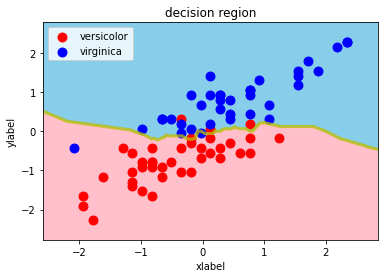

In [97]:
# k = 5, 訓練データ
decision_region(norm_train_X, train_y, model=knn_5)

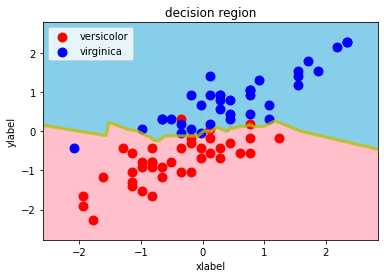

In [98]:
# k = 3, 訓練データ
decision_region(norm_train_X, train_y, model=knn_3)

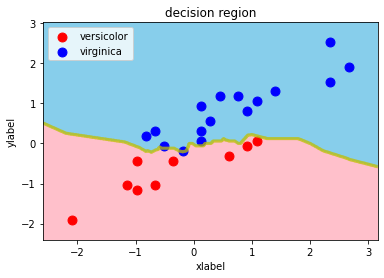

In [99]:
# k = 5, テストデータ
decision_region(norm_test_X, result_5, model=knn_5)

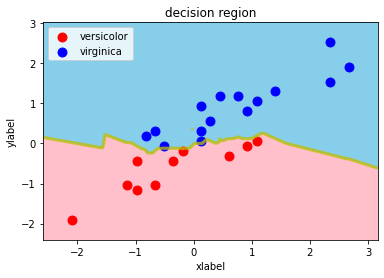

In [100]:
# k = 3, テストデータ
decision_region(norm_test_X, result_3, model=knn_3)

【問題8】他の手法の学習

In [130]:
# 必要な手法のライブラリインポート
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
accuracy_list = []
precision_list = []
recall_list = []
f_value_list = []

正解率: 92.0%
適合率: 100.0%
再現率: 81.81818181818183%
F値: 0.9


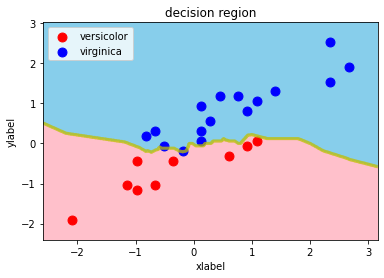

In [131]:
# 最近傍法(k=5)
knn = KNeighborsClassifier()
knn.fit(norm_train_X, train_y)
knn_result = knn.predict(norm_test_X)

accuracy = metrics.accuracy_score(test_y, knn_result)
print('正解率: {}%'.format(accuracy*100))

precision = metrics.precision_score(test_y, knn_result)
print('適合率: {}%'.format(precision*100))

recall = metrics.recall_score(test_y, knn_result)
print('再現率: {}%'.format(recall*100))

f_value = metrics.f1_score(test_y, knn_result)
print('F値: {}'.format(f_value))

decision_region(norm_test_X, knn_result, model=knn)
accuracy_list.append(accuracy*100)
precision_list.append(precision*100)
recall_list.append(precision*100)
f_value_list.append(f_value)

正解率: 100.0%
適合率: 100.0%
再現率: 100.0%
F値: 1.0


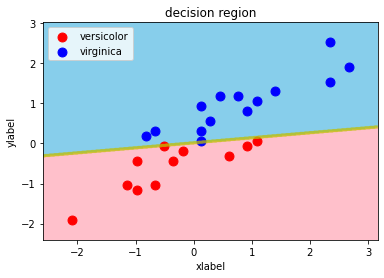

In [132]:
# ロジスティック回帰
LR = LogisticRegression()
LR.fit(norm_train_X, train_y)
LR_result = LR.predict(norm_test_X)

accuracy = metrics.accuracy_score(test_y, LR_result)
print('正解率: {}%'.format(accuracy*100))

precision = metrics.precision_score(test_y, LR_result)
print('適合率: {}%'.format(precision*100))

recall = metrics.recall_score(test_y, LR_result)
print('再現率: {}%'.format(recall*100))

f_value = metrics.f1_score(test_y, LR_result)
print('F値: {}'.format(f_value))

decision_region(norm_test_X, LR_result, model=LR)
accuracy_list.append(accuracy*100)
precision_list.append(precision*100)
recall_list.append(precision*100)
f_value_list.append(f_value)

正解率: 96.0%
適合率: 100.0%
再現率: 90.9090909090909%
F値: 0.9523809523809523


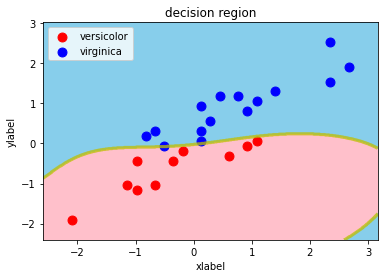

In [133]:
# SVM
svm = SVC()
svm.fit(norm_train_X, train_y)
svm_result = svm.predict(norm_test_X)

accuracy = metrics.accuracy_score(test_y, svm_result)
print('正解率: {}%'.format(accuracy*100))

precision = metrics.precision_score(test_y, svm_result)
print('適合率: {}%'.format(precision*100))

recall = metrics.recall_score(test_y, svm_result)
print('再現率: {}%'.format(recall*100))

f_value = metrics.f1_score(test_y, svm_result)
print('F値: {}'.format(f_value))

decision_region(norm_test_X, svm_result, model=svm)
accuracy_list.append(accuracy*100)
precision_list.append(precision*100)
recall_list.append(precision*100)
f_value_list.append(f_value)

正解率: 88.0%
適合率: 90.0%
再現率: 81.81818181818183%
F値: 0.8571428571428572


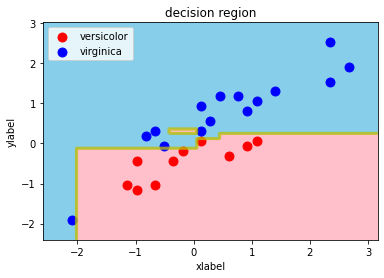

In [134]:
# 決定木
DTC = DecisionTreeClassifier()
DTC.fit(norm_train_X, train_y)
DTC_result = DTC.predict(norm_test_X)

accuracy = metrics.accuracy_score(test_y, DTC_result)
print('正解率: {}%'.format(accuracy*100))

precision = metrics.precision_score(test_y, DTC_result)
print('適合率: {}%'.format(precision*100))

recall = metrics.recall_score(test_y, DTC_result)
print('再現率: {}%'.format(recall*100))

f_value = metrics.f1_score(test_y, DTC_result)
print('F値: {}'.format(f_value))

decision_region(norm_test_X, DTC_result, model=DTC)
accuracy_list.append(accuracy*100)
precision_list.append(precision*100)
recall_list.append(precision*100)
f_value_list.append(f_value)

正解率: 88.0%
適合率: 90.0%
再現率: 81.81818181818183%
F値: 0.8571428571428572


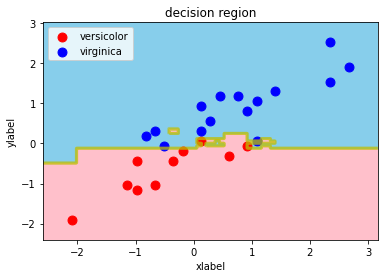

In [135]:
# ランダムフォレスト
RF = RandomForestClassifier()
RF.fit(norm_train_X, train_y)
RF_result = RF.predict(norm_test_X)

accuracy = metrics.accuracy_score(test_y, RF_result)
print('正解率: {}%'.format(accuracy*100))

precision = metrics.precision_score(test_y, RF_result)
print('適合率: {}%'.format(precision*100))

recall = metrics.recall_score(test_y, RF_result)
print('再現率: {}%'.format(recall*100))

f_value = metrics.f1_score(test_y, RF_result)
print('F値: {}'.format(f_value))

decision_region(norm_test_X, RF_result, model=RF)
accuracy_list.append(accuracy*100)
precision_list.append(precision*100)
recall_list.append(precision*100)
f_value_list.append(f_value)

In [144]:
# 結果を表にまとめる
result_df = pd.DataFrame([])
result_df['accuracy'] = accuracy_list
result_df['precision'] = precision_list
result_df['recall'] = recall_list
result_df['f_value'] = f_value_list
result_df.rename(index={0:'k-nearest', 1:'Logistic Regression', 2:'SVM', 3:'Desicion Tree', 4:'Random Forest'}, inplace=True)

In [145]:
result_df

,accuracy,precision,recall,f_value
k-nearest,92.0,100.0,100.0,0.900000
Logistic Regression,100.0,100.0,100.0,1.000000
SVM,96.0,100.0,100.0,0.952381
Desicion Tree,88.0,90.0,90.0,0.857143
Random Forest,88.0,90.0,90.0,0.857143


考察：
これらの結果と決定領域から、全ての指標において、最も優秀だったのがロジスティック回帰であった。ロジスティック回帰の決定領域とその他手法の決定領域を確認すると、データが密集している(0, 0)付近で間違いが発生しているのがわかる。<br>
また、SVM, 最近傍法では再現率、適合率で100%であったものの、FP, FNが発生した事により精度・F値において惜しくも100%に届かなかった。<br>

【問題9】（アドバンス課題）標準化の有無の比較

In [155]:
accuracy_list = []
precision_list = []
recall_list = []
f_value_list = []

正解率: 96.0%
適合率: 100.0%
再現率: 90.9090909090909%
F値: 0.9523809523809523


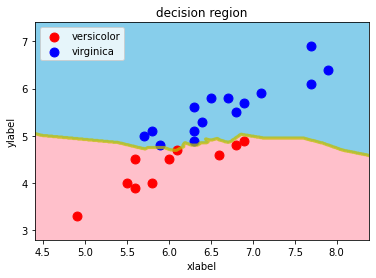

In [156]:
# 最近傍法(k=5)
knn = KNeighborsClassifier()
knn.fit(train_X, train_y)
knn_result = knn.predict(test_X)

accuracy = metrics.accuracy_score(test_y, knn_result)
print('正解率: {}%'.format(accuracy*100))

precision = metrics.precision_score(test_y, knn_result)
print('適合率: {}%'.format(precision*100))

recall = metrics.recall_score(test_y, knn_result)
print('再現率: {}%'.format(recall*100))

f_value = metrics.f1_score(test_y, knn_result)
print('F値: {}'.format(f_value))

decision_region(test_X, knn_result, model=knn)
accuracy_list.append(accuracy*100)
precision_list.append(precision*100)
recall_list.append(precision*100)
f_value_list.append(f_value)

正解率: 100.0%
適合率: 100.0%
再現率: 100.0%
F値: 1.0


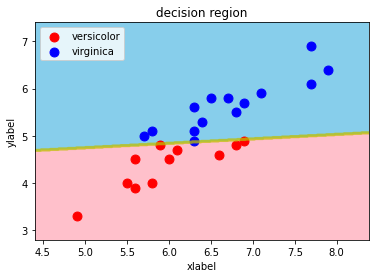

In [157]:
# ロジスティック回帰
LR = LogisticRegression()
LR.fit(train_X, train_y)
LR_result = LR.predict(test_X)

accuracy = metrics.accuracy_score(test_y, LR_result)
print('正解率: {}%'.format(accuracy*100))

precision = metrics.precision_score(test_y, LR_result)
print('適合率: {}%'.format(precision*100))

recall = metrics.recall_score(test_y, LR_result)
print('再現率: {}%'.format(recall*100))

f_value = metrics.f1_score(test_y, LR_result)
print('F値: {}'.format(f_value))

decision_region(test_X, LR_result, model=LR)
accuracy_list.append(accuracy*100)
precision_list.append(precision*100)
recall_list.append(precision*100)
f_value_list.append(f_value)

正解率: 96.0%
適合率: 100.0%
再現率: 90.9090909090909%
F値: 0.9523809523809523


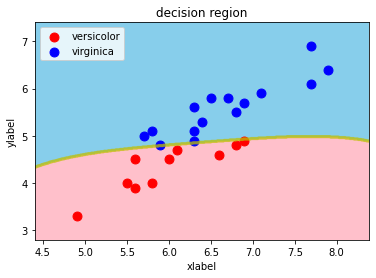

In [158]:
# SVM
svm = SVC()
svm.fit(train_X, train_y)
svm_result = svm.predict(test_X)

accuracy = metrics.accuracy_score(test_y, svm_result)
print('正解率: {}%'.format(accuracy*100))

precision = metrics.precision_score(test_y, svm_result)
print('適合率: {}%'.format(precision*100))

recall = metrics.recall_score(test_y, svm_result)
print('再現率: {}%'.format(recall*100))

f_value = metrics.f1_score(test_y, svm_result)
print('F値: {}'.format(f_value))

decision_region(test_X, svm_result, model=svm)
accuracy_list.append(accuracy*100)
precision_list.append(precision*100)
recall_list.append(precision*100)
f_value_list.append(f_value)

正解率: 88.0%
適合率: 90.0%
再現率: 81.81818181818183%
F値: 0.8571428571428572


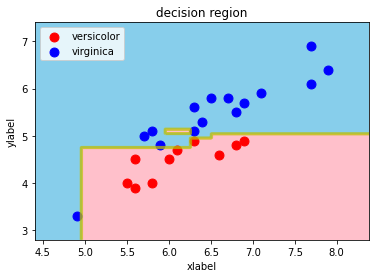

In [159]:
# 決定木
DTC = DecisionTreeClassifier()
DTC.fit(train_X, train_y)
DTC_result = DTC.predict(test_X)

accuracy = metrics.accuracy_score(test_y, DTC_result)
print('正解率: {}%'.format(accuracy*100))

precision = metrics.precision_score(test_y, DTC_result)
print('適合率: {}%'.format(precision*100))

recall = metrics.recall_score(test_y, DTC_result)
print('再現率: {}%'.format(recall*100))

f_value = metrics.f1_score(test_y, DTC_result)
print('F値: {}'.format(f_value))

decision_region(test_X, DTC_result, model=DTC)
accuracy_list.append(accuracy*100)
precision_list.append(precision*100)
recall_list.append(precision*100)
f_value_list.append(f_value)

正解率: 84.0%
適合率: 88.88888888888889%
再現率: 72.72727272727273%
F値: 0.7999999999999999


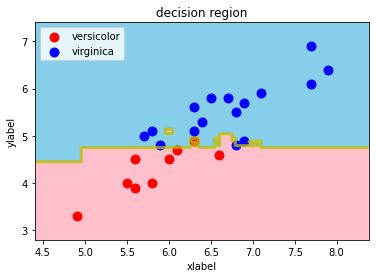

In [160]:
# ランダムフォレスト
RF = RandomForestClassifier()
RF.fit(train_X, train_y)
RF_result = RF.predict(test_X)

accuracy = metrics.accuracy_score(test_y, RF_result)
print('正解率: {}%'.format(accuracy*100))

precision = metrics.precision_score(test_y, RF_result)
print('適合率: {}%'.format(precision*100))

recall = metrics.recall_score(test_y, RF_result)
print('再現率: {}%'.format(recall*100))

f_value = metrics.f1_score(test_y, RF_result)
print('F値: {}'.format(f_value))

decision_region(test_X, RF_result, model=RF)
accuracy_list.append(accuracy*100)
precision_list.append(precision*100)
recall_list.append(precision*100)
f_value_list.append(f_value)

In [161]:
# 結果を表にまとめる
result_df = pd.DataFrame([])
result_df['accuracy'] = accuracy_list
result_df['precision'] = precision_list
result_df['recall'] = recall_list
result_df['f_value'] = f_value_list
result_df.rename(index={0:'k-nearest', 1:'Logistic Regression', 2:'SVM', 3:'Desicion Tree', 4:'Random Forest'}, inplace=True)

In [162]:
result_df

,accuracy,precision,recall,f_value
k-nearest,96.0,100.000000,100.000000,0.952381
Logistic Regression,100.0,100.000000,100.000000,1.000000
SVM,96.0,100.000000,100.000000,0.952381
Desicion Tree,88.0,90.000000,90.000000,0.857143
Random Forest,84.0,88.888889,88.888889,0.800000


考察：標準化後のデータで行った場合と同様に、上位３つの手法については精度に大きな影響を受けなかった。<br>
特にランダムフォレストについて、精度に大きな変化はなかったものの、F値が大きく低下してしまった。<br>
これは、FP, FNが増加している事を示しており、見かけの精度は落ちていないものの、モデルとしての信頼性が下がってしまっている。<br>
標準化によって、特徴量の値が小さくなり、いたずらに選んだ特徴量のどちらかが結果に影響を与える事を防いでいたものが、なくなってしまった為と考える<br>
参考サイト：https://qiita.com/yShig/items/dbeb98598abcc98e1a57<br>

【問題10】（アドバンス課題）全ての目的変数を使用して精度が高い手法

参考サイト：https://rf00.hatenablog.com/entry/2020/03/22/141453<br>
マクロ平均：https://analysis-navi.com/?p=553<br>
マイクロ平均とマクロ平均の違いについて：https://axa.biopapyrus.jp/machine-learning/model-evaluation/evaluation-measures.html<br>

In [165]:
# week3-1　事前課題より抜粋
iris = datasets.load_iris()
print(iris.target_names)
# 全てのラベルを抜き出す
X = pd.DataFrame(iris.data, columns=(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']))
y = pd.DataFrame(iris.target, columns=(['Species']))
df = pd.concat([X, y], axis=1)
train_df = df[['sepal_length', 'petal_length', 'Species']]

# データを訓練、テストに分割
train, test = train_test_split(train_df, test_size=0.25)
train_y = train['Species']
test_y = test['Species']
train.drop(columns='Species', axis=1, inplace=True)
test.drop(columns='Species', axis=1, inplace=True)
# 以下ndarrayの入力データ達
train_y = np.array(train_y)
test_y = np.array(test_y)
train_X = np.array(train)
test_X = np.array(test)

# 標準化
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()
StandardScaler.fit(train)
norm_train_X = StandardScaler.transform(train_X)
norm_test_X = StandardScaler.transform(test_X)


['setosa' 'versicolor' 'virginica']


In [173]:
def decision_region_ver2(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa', 'versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue', 'black']
    contourf_color = ['pink', 'skyblue', 'green']
    n_class = 3
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [197]:
accuracy_list = []
precision_list = []
recall_list = []
f_value_list = []

正解率: 92.10526315789474%
適合率: 93.33333333333333%
再現率: 92.3076923076923%
F値: 0.9194847020933977


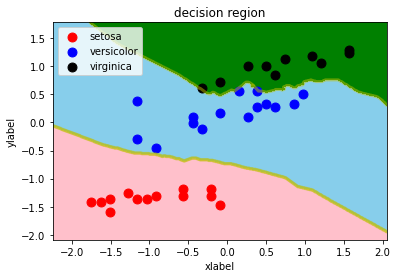

In [198]:
# 最近傍法(k=5)
knn = KNeighborsClassifier()
knn.fit(norm_train_X, train_y)
knn_result = knn.predict(norm_test_X)

accuracy = metrics.accuracy_score(test_y, knn_result)
print('正解率: {}%'.format(accuracy*100))

precision = metrics.precision_score(test_y, knn_result, average='macro')
print('適合率: {}%'.format(precision*100))

recall = metrics.recall_score(test_y, knn_result, average='macro')
print('再現率: {}%'.format(recall*100))

f_value = metrics.f1_score(test_y, knn_result, average='macro')
print('F値: {}'.format(f_value))

decision_region_ver2(norm_test_X, knn_result, model=knn)
accuracy_list.append(accuracy*100)
precision_list.append(precision*100)
recall_list.append(precision*100)
f_value_list.append(f_value)

正解率: 84.21052631578947%
適合率: 87.20238095238096%
再現率: 84.4017094017094%
F値: 0.8368606701940036


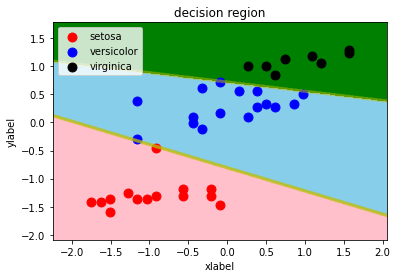

In [199]:
# ロジスティック回帰
LR = LogisticRegression()
LR.fit(norm_train_X, train_y)
LR_result = LR.predict(norm_test_X)

accuracy = metrics.accuracy_score(test_y, LR_result)
print('正解率: {}%'.format(accuracy*100))

precision = metrics.precision_score(test_y, LR_result, average='macro')
print('適合率: {}%'.format(precision*100))

recall = metrics.recall_score(test_y, LR_result, average='macro')
print('再現率: {}%'.format(recall*100))

f_value = metrics.f1_score(test_y, LR_result, average='macro')
print('F値: {}'.format(f_value))

decision_region_ver2(norm_test_X, LR_result, model=LR)
accuracy_list.append(accuracy*100)
precision_list.append(precision*100)
recall_list.append(precision*100)
f_value_list.append(f_value)

正解率: 89.47368421052632%
適合率: 91.66666666666666%
再現率: 89.74358974358975%
F値: 0.8917748917748917


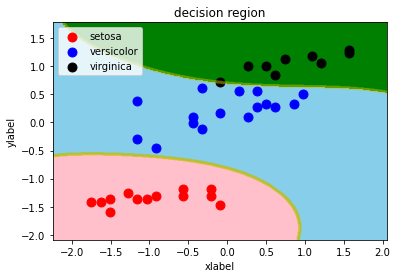

In [200]:
# SVM
svm = SVC()
svm.fit(norm_train_X, train_y)
svm_result = svm.predict(norm_test_X)

accuracy = metrics.accuracy_score(test_y, svm_result)
print('正解率: {}%'.format(accuracy*100))

precision = metrics.precision_score(test_y, svm_result, average='macro')
print('適合率: {}%'.format(precision*100))

recall = metrics.recall_score(test_y, svm_result, average='macro')
print('再現率: {}%'.format(recall*100))

f_value = metrics.f1_score(test_y, svm_result, average='macro')
print('F値: {}'.format(f_value))

decision_region_ver2(norm_test_X, svm_result, model=svm)
accuracy_list.append(accuracy*100)
precision_list.append(precision*100)
recall_list.append(precision*100)
f_value_list.append(f_value)

正解率: 89.47368421052632%
適合率: 91.66666666666666%
再現率: 89.74358974358975%
F値: 0.8917748917748917


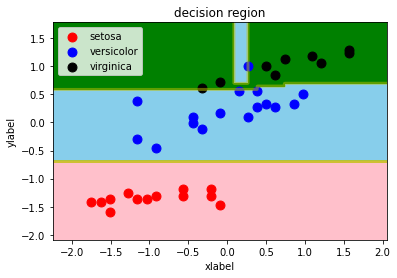

In [201]:
# 決定木
DTC = DecisionTreeClassifier()
DTC.fit(norm_train_X, train_y)
DTC_result = DTC.predict(norm_test_X)

accuracy = metrics.accuracy_score(test_y, DTC_result)
print('正解率: {}%'.format(accuracy*100))

precision = metrics.precision_score(test_y, DTC_result, average='macro')
print('適合率: {}%'.format(precision*100))

recall = metrics.recall_score(test_y, DTC_result, average='macro')
print('再現率: {}%'.format(recall*100))

f_value = metrics.f1_score(test_y, DTC_result, average='macro')
print('F値: {}'.format(f_value))

decision_region_ver2(norm_test_X, DTC_result, model=DTC)
accuracy_list.append(accuracy*100)
precision_list.append(precision*100)
recall_list.append(precision*100)
f_value_list.append(f_value)

正解率: 89.47368421052632%
適合率: 91.66666666666666%
再現率: 89.74358974358975%
F値: 0.8917748917748917


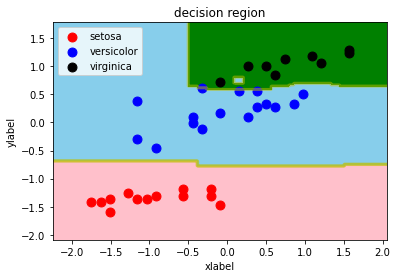

In [202]:
# ランダムフォレスト
RF = RandomForestClassifier()
RF.fit(norm_train_X, train_y)
RF_result = RF.predict(norm_test_X)

accuracy = metrics.accuracy_score(test_y, RF_result)
print('正解率: {}%'.format(accuracy*100))

precision = metrics.precision_score(test_y, RF_result, average='macro')
print('適合率: {}%'.format(precision*100))

recall = metrics.recall_score(test_y, RF_result, average='macro')
print('再現率: {}%'.format(recall*100))

f_value = metrics.f1_score(test_y, RF_result, average='macro')
print('F値: {}'.format(f_value))

decision_region_ver2(norm_test_X, RF_result, model=RF)
accuracy_list.append(accuracy*100)
precision_list.append(precision*100)
recall_list.append(precision*100)
f_value_list.append(f_value)

In [203]:
# 結果を表にまとめる
result_df = pd.DataFrame([])
result_df['accuracy'] = accuracy_list
result_df['precision'] = precision_list
result_df['recall'] = recall_list
result_df['f_value'] = f_value_list
result_df.rename(index={0:'k-nearest', 1:'Logistic Regression', 2:'SVM', 3:'Desicion Tree', 4:'Random Forest'}, inplace=True)

In [204]:
result_df

,accuracy,precision,recall,f_value
k-nearest,92.105263,93.333333,93.333333,0.919485
Logistic Regression,84.210526,87.202381,87.202381,0.836861
SVM,89.473684,91.666667,91.666667,0.891775
Desicion Tree,89.473684,91.666667,91.666667,0.891775
Random Forest,89.473684,91.666667,91.666667,0.891775
